<a href="https://colab.research.google.com/github/NagumalliSowmika/The-Sparks-Foundation-Tasks/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation Task-2**

# **Prediction by using Unsupervised Machine Learning**

**Aim:To implement KMeans clustering on dataset.**

**Description:**This model will help them categorize the iris data with different clusters.
The datasets contain 150 iris data with four columns Sepal Length,Sepal Width,Petal Length,Petal Width.

**Working Model:**In this means we will see the python scikit learn library KMeans Clustering of MachineLearning can be used to implement Clustering factors.

# **NAME: NAGUMALLI SOWMIKA**

**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Importing Dataset**

In [2]:
df=pd.read_csv('iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


**DATA OVERVIEW**

In [5]:
#displaying datatype of each column and also displaying the non-null row
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#displaying the summary stats that include count,mean,std,min,max etc
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# dropping ID column
df.drop(['Id'],axis=1,inplace=True)

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values.

**Finding the correlation between sepal length and sepal width**

In [10]:
SepalLength = df['SepalLengthCm']
SepalWidth = df['SepalWidthCm']
correlation = SepalLength.corr(SepalWidth)
correlation

-0.10936924995064937

There is a **negative correlation** between **SepalLength** and **SepalWidth**

**Finding Correlation between PetalLength and PetalWidth.**

In [11]:
PetalLength = df['PetalLengthCm']
PetalWidth = df['PetalWidthCm']
correlation = PetalLength.corr(PetalWidth)
correlation

0.9627570970509663

There is a **Positive correlation** beween **PetalLength** and **Petal Width**

**Finding correlation by using Pearson method**

In [12]:
corr = df.corr(method='pearson')
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


**Exploratory Data Analysis**

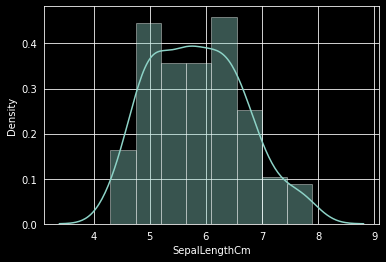

In [30]:
from matplotlib import style
style.use('dark_background')
sns.distplot(df['SepalLengthCm'])

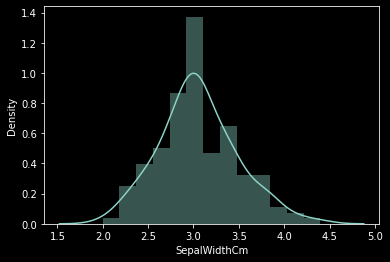

In [14]:
sns.distplot(df['SepalWidthCm'])

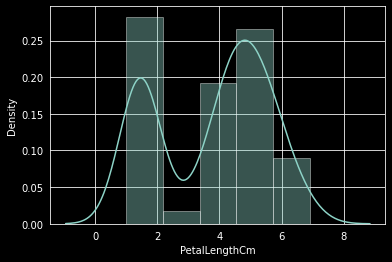

In [26]:
sns.distplot(df['PetalLengthCm'])

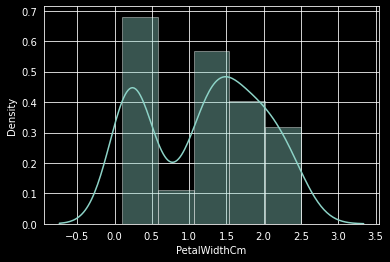

In [27]:
sns.distplot(df['PetalWidthCm'])

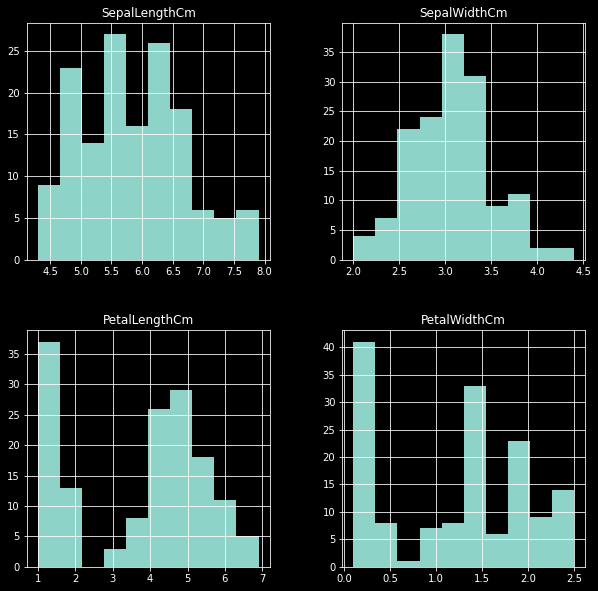

In [17]:
df.hist(figsize=(10,10));

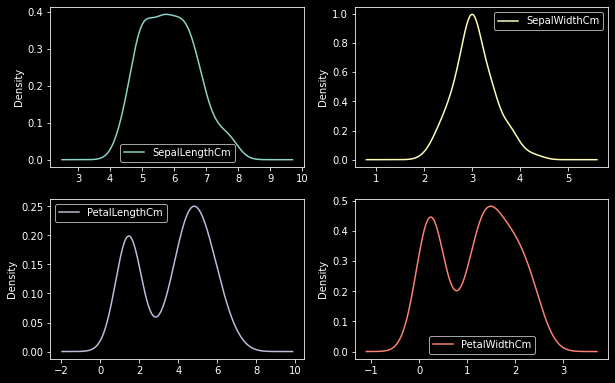

In [18]:
df.plot(kind='density',subplots=True,layout=(3,2),sharex=False,figsize=(10,10));

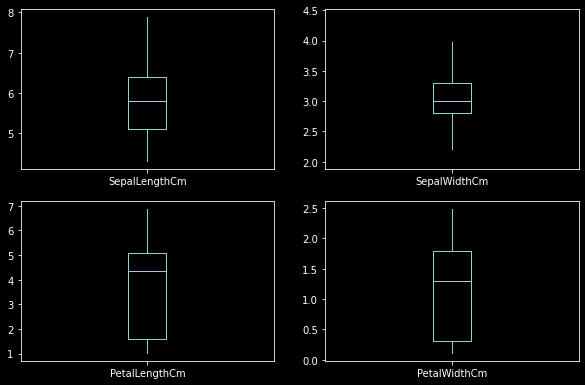

In [19]:
df.plot(kind='box',subplots=True,layout=(3,2),sharex=False,figsize=(10,10));

**visualizing SepalLength vs SepalWidth using Scatterplot**

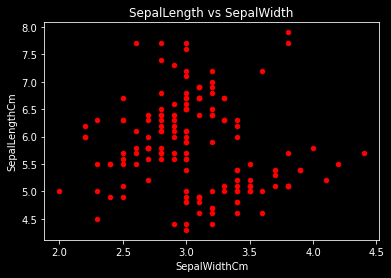

In [20]:
df.plot(kind='scatter',marker='o',x='SepalWidthCm',y='SepalLengthCm',title='SepalLength vs SepalWidth',c='red')

**visualizing PetalLength vs PetalWidth using scatterplot**

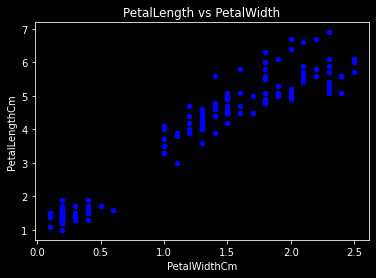

In [21]:
df.plot(kind='scatter',marker='o',x='PetalWidthCm',y='PetalLengthCm',title='PetalLength vs PetalWidth',c='blue')

**visualizing dataset using pairplot**

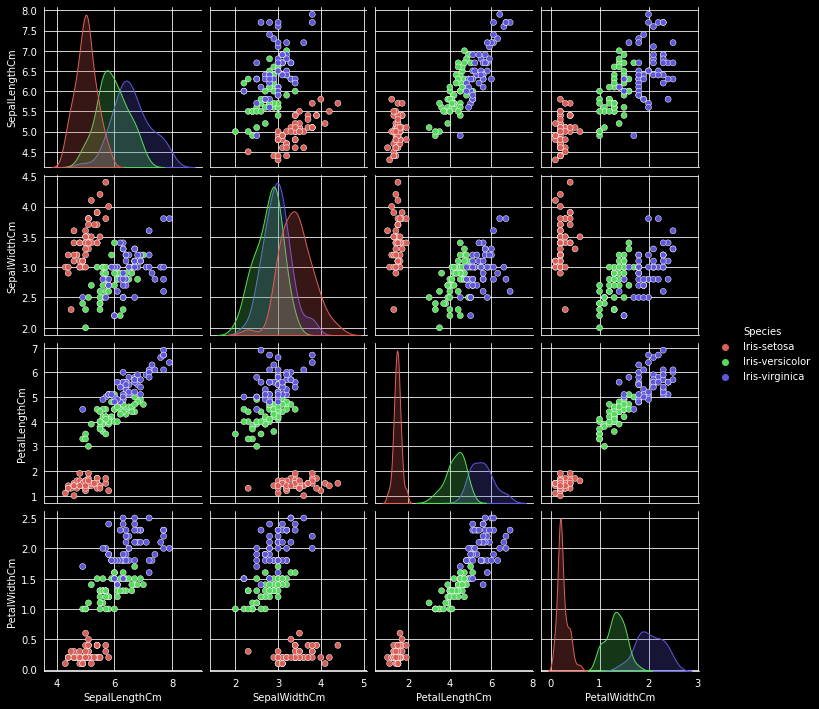

In [31]:
sns.pairplot(df,hue='Species',palette='hls')

**Finding correlation using heatmap**

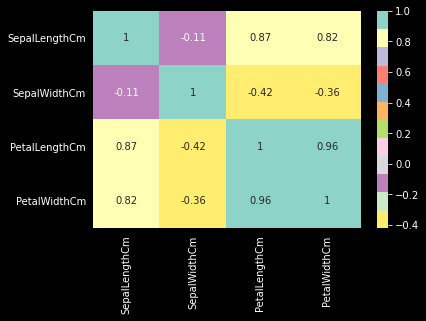

In [32]:
sns.heatmap(df.corr(),annot=True,cmap='Set3_r')

**Finding the optimum number of clusters for k-means classification**


k: 1 WCSS: 680.8244
k: 2 WCSS: 152.36870647733906
k: 3 WCSS: 78.94084142614602
k: 4 WCSS: 57.345409315718165
k: 5 WCSS: 46.53558205128205
k: 6 WCSS: 38.93873974358974
k: 7 WCSS: 34.19068792479662
k: 8 WCSS: 29.905374299825105
k: 9 WCSS: 27.927882157034972
k: 10 WCSS: 25.95549708624709


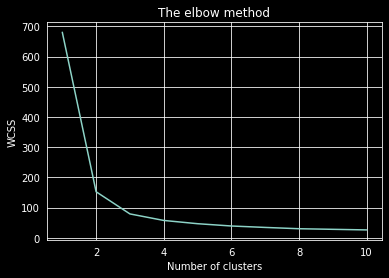

In [34]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('k:',i, 'WCSS:',kmeans.inertia_ )
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**Building the Machine Learning Model KMeans**

In [35]:
#Training the model
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [36]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

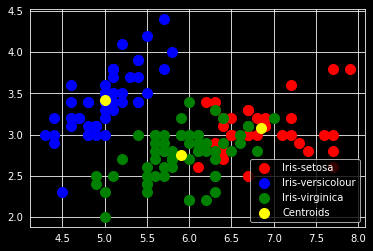

In [37]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**Conclusion**: The above graph represents that the model clustered the dataset into 3 different clusters with the centeroids